Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('insurance.csv')

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.describe(percentiles=[0.01,0.05,0.95,0.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
1%,18.000000,17.895150,0.000000,1252.972730
5%,18.000000,21.256000,0.000000,1757.753400
50%,39.000000,30.400000,1.000000,9382.033000
95%,62.000000,41.106000,3.000000,41181.827787
99%,64.000000,46.407900,5.000000,48537.480726
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
X = dataset.iloc[ : , 0 ].values
Y = dataset.iloc[ : , 6 ].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

In [6]:
Y_pred = regressor.predict(X_test)

In [7]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(Y_test,Y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test,Y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE:  9119.575392858962
MSE:  137947840.25129464
RMSE:  11745.119848315497


In [8]:
regressor.score(X_train, Y_train)

0.07560059818826381

In [9]:
regressor.score(X_test, Y_test)

0.12377637021224341

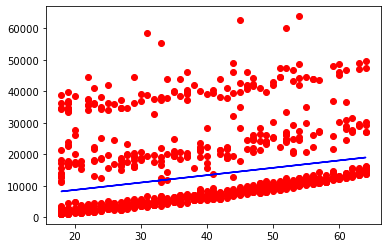

In [10]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

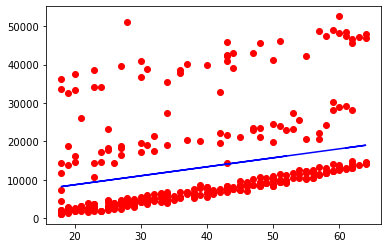

In [11]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')

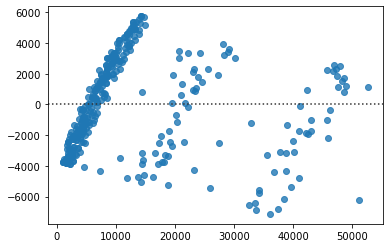

In [12]:
import seaborn as sns
sns.residplot(Y_test, Y_pred)  
plt.show()

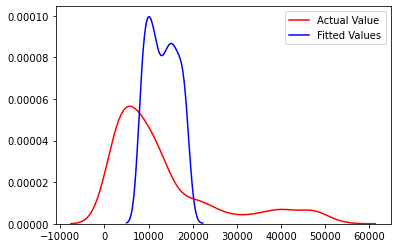

In [14]:
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)